# Train and evaluate ResNet23

In [18]:
from pathlib import Path
from resnet23 import ResNet23
import matplotlib.pyplot as plt
import cv2
from collections import defaultdict

from data.dataset import Dataset
from data.data_preparation import gaussian_kernel

## Load model and data

In [9]:
data_path = Path(r"D:\Nabil_object_detection\data\single_position_experiments\annotations\resnet_data\lensfree")

In [3]:
# Import model and dataset
resnet23 = ResNet23()
data = Dataset(data_path, img_name="image.png", pmap_name="prob_map.tif")

In [4]:
# Split dataset into train and validation images.
# Dataset class supports random split over all images or leaving out certain experiments. (See function __doc__ for more info).

# Taking 20% of the images as validation images:
# train_ids, val_ids = data.split_data(0.2)

# Taking out a single experiment (nrk_experiment) as validation data
# train_ids, val_ids = data.split_data("20200630_Osteoblasts")

# Taking out a multiple experiments as validation data
train_ids, val_ids = data.split_data(["20200630_Osteoblasts", "20200701_Osteoblasts"])

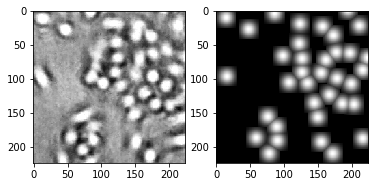

In [8]:
# Show example data
img, pm = data[train_ids[0]]

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(pm, cmap="gray")
plt.show()

## Train single model

In [ ]:
plt.imshow(pmap[..., 0])

In [ ]:
history = resnet23.train(train=data.generate_train_data(batch_size=1),
                         val=data.generate_val_data(batch_size=1),
                         steps_per_epoch=100,
                         validation_steps=10,
                         epochs=20)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.show()

In [ ]:
# Predict on example training image
img, pm = data[train_ids[0]]
out = resnet23.predict(img)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.title("Input")
plt.imshow(img)
plt.subplot(132)
plt.title("GT")
plt.imshow(pm)
plt.subplot(133)
plt.title("Prediction")
plt.imshow(out)
plt.show()

In [ ]:
# Predict on example validation image
img, pm = data[val_ids[0]]
out = resnet23.predict(img)

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.title("Input")
plt.imshow(img)
plt.subplot(132)
plt.title("GT")
plt.imshow(pm)
plt.subplot(133)
plt.title("Prediction")
plt.imshow(out)
plt.show()

# Cross validate on data type

In [39]:
# Map cell type name to all experiments

cell_types = defaultdict(list)
for experiment in data_path.iterdir():
    if not experiment.is_dir():
        continue
    cell_type = experiment.name.split("_")[1]
    cell_types[cell_type].append(experiment.name)

In [46]:
for cell_type, experiments in cell_types.items():
    train_ids, val_ids = data.split_data(experiments)
    print(f"{cell_type}\n\tTrain: {len(train_ids)}\n\tVal: {len(val_ids)}")

Osteoblasts
	Train: 1680
	Val: 792
A549
	Train: 1816
	Val: 656
BxPc-3
	Train: 1448
	Val: 1024


In [41]:
output_path = Path(r"D:\Nabil_object_detection\resnet23_models\cell_types_lf")

In [47]:
for cell_type, experiments in cell_types.items():
    train_ids, val_ids = data.split_data(experiments)

    resnet23 = ResNet23()

    history = resnet23.train(train=data.generate_train_data(batch_size=1),
                         val=data.generate_val_data(batch_size=1),
                         steps_per_epoch=10,
                         validation_steps=1,
                         epochs=5)

    resnet23.save_model(output_path.joinpath(f"{cell_type}.h5"))

Epoch 1/5
10/10 [==============================] - 12s 1s/step - loss: 11.5819 - val_loss: 7644457472.0000
Epoch 2/5
10/10 [==============================] - 2s 217ms/step - loss: 2.7329 - val_loss: 91256733696.0000
Epoch 3/5
10/10 [==============================] - 2s 230ms/step - loss: 1.7556 - val_loss: 618265856.0000
Epoch 4/5
10/10 [==============================] - 2s 229ms/step - loss: 1.5013 - val_loss: 5368169.0000
Epoch 5/5
10/10 [==============================] - 2s 228ms/step - loss: 1.3717 - val_loss: 127446.5312


Epoch 1/5
10/10 [==============================] - 11s 1s/step - loss: 6.4586 - val_loss: 291565600768.0000
Epoch 2/5
10/10 [==============================] - 2s 217ms/step - loss: 3.6640 - val_loss: 139948457984.0000
Epoch 3/5
10/10 [==============================] - 2s 229ms/step - loss: 1.0991 - val_loss: 1070874688.0000
Epoch 4/5
10/10 [==============================] - 2s 230ms/step - loss: 0.5276 - val_loss: 7175915.0000
Epoch 5/5
10/10 [==============================] - 2s 226ms/step - loss: 0.3980 - val_loss: 345334.7500


KeyboardInterrupt: 